In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import networkx.algorithms as nxa
import networkx.algorithms.approximation as nxaa
import numpy as np
import get_adj_mx

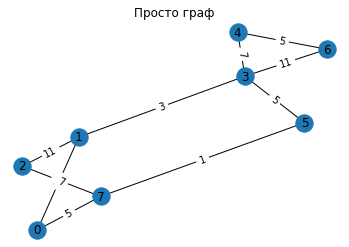

In [2]:
data = get_adj_mx.get_adj_matrix("graph_mx.txt")
adj_matrix = np.matrix(data['edges'])

plt.title('Просто граф')
G = nx.Graph(adj_matrix)
for i in range(len(data['weights'])):
    G.nodes[i]['weight'] = data['weights'][i]
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()



Максимальне зважене паросполучення (реберне пакування) {(0, 7), (1, 2), (3, 6)}


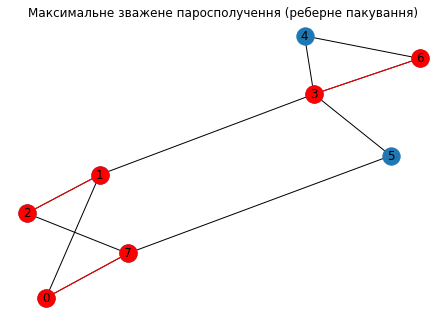

In [3]:

# TODO: Draw all of this
nx.draw(G, pos, with_labels=True)
max_w_match = nx.max_weight_matching(G, maxcardinality=False, weight='weight')
print("Максимальне зважене паросполучення (реберне пакування)", max_w_match)
plt.title('Максимальне зважене паросполучення (реберне пакування)')
Gr = nx.Graph()
Gr.add_edges_from(max_w_match)
nx.draw_networkx_nodes(Gr, pos, node_color='r')
nx.draw_networkx_edges(Gr, pos, edge_color='r',
                       connectionstyle='arc3, rad = 0.3')
plt.show()

Максимальна зважена незалежна множина вершин (вершинне пакування) [2, 0, 5, 6]


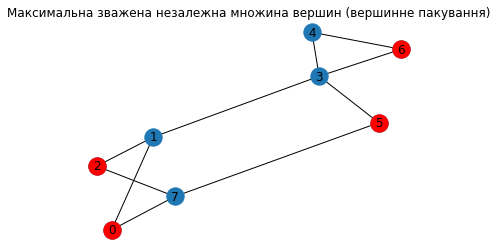

In [4]:
plt.title('Максимальна зважена незалежна множина вершин (вершинне пакування)')
nx.draw(G, pos, with_labels=True)
max_independent_set = nx.maximal_independent_set(G)
print("Максимальна зважена незалежна множина вершин (вершинне пакування)",
      max_independent_set)
Gr = nx.Graph()
Gr.add_nodes_from(max_independent_set)
nx.draw_networkx_nodes(Gr, pos, node_color='r')

plt.show()

Мiнiмальне зважене реберне покриття {(0, 7), (1, 2), (4, 6), (3, 5)}


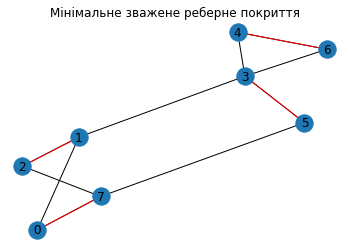

In [5]:
plt.title('Мiнiмальне зважене реберне покриття')
min_edge_cover = nx.min_edge_cover(G)
nx.draw(G, pos, with_labels=True)
print("Мiнiмальне зважене реберне покриття", min_edge_cover)
Gr = nx.Graph()
Gr.add_edges_from(min_edge_cover)
nx.draw_networkx_edges(Gr, pos, edge_color='r',
                       connectionstyle='arc3, rad = 0.3')
plt.show()

Мiнiмальне зважене вершинне покриття {0, 1, 2, 3, 4, 7}


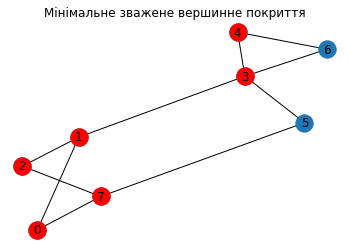

In [6]:
plt.title('Мiнiмальне зважене вершинне покриття')
min_node_cover = nxaa.min_weighted_vertex_cover(G)
print("Мiнiмальне зважене вершинне покриття", min_node_cover)
nx.draw(G, pos, with_labels=True)
Gr = nx.Graph()
Gr.add_nodes_from(min_node_cover)
nx.draw_networkx_nodes(Gr, pos, node_color='r')
plt.show()

Максимальний зважений повний пiдграф (клiка) зважене вершинне покриття ([6, 4, 3], 11)


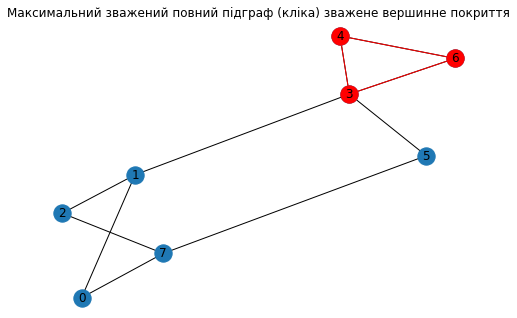

In [7]:
cliques = nxa.max_weight_clique(G)
nx.draw(G, pos, with_labels=True)
print("Максимальний зважений повний пiдграф (клiка) зважене вершинне покриття", cliques)
plt.title('Максимальний зважений повний пiдграф (клiка) зважене вершинне покриття')
Gr = G.subgraph(cliques[0])
nx.draw_networkx_nodes(Gr, pos, node_color='r')
nx.draw_networkx_edges(Gr, pos, edge_color='r',
                       connectionstyle='arc3, rad = 0.3')
plt.show()

Мiнiмальна правильна розфарбовка вершин {3: 0, 1: 1, 7: 0, 0: 2, 2: 2, 4: 1, 5: 1, 6: 2}


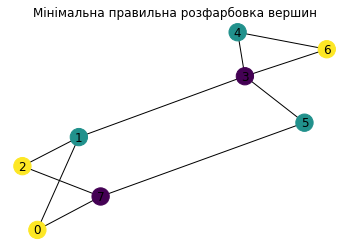

In [8]:
plt.title('Мiнiмальна правильна розфарбовка вершин')
min_color = nx.greedy_color(G)
print("Мiнiмальна правильна розфарбовка вершин", min_color)
color_map = [0]*len(G.nodes)
for i, c in min_color.items():
    color_map[i] = c
nx.draw(G, pos, with_labels=True, node_color=color_map)
Gr = nx.Graph()
plt.show()

Мiнiмальне зважене остовне дерево 


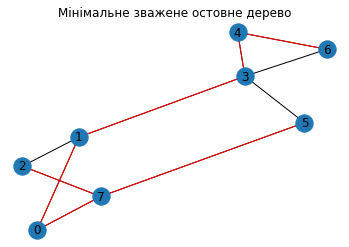

In [9]:
plt.title('Мiнiмальне зважене остовне дерево')
minimum_spanning_tree = nx.minimum_spanning_tree(G)
nx.draw(G, pos, with_labels=True)
print("Мiнiмальне зважене остовне дерево", minimum_spanning_tree)
nx.draw_networkx_edges(minimum_spanning_tree, pos, edge_color='r',
                       connectionstyle='arc3, rad = 0.3')
plt.show()

Фундаментальна система циклiв [[1, 3, 5, 7, 0], [4, 6, 3], [1, 2, 7, 0]]


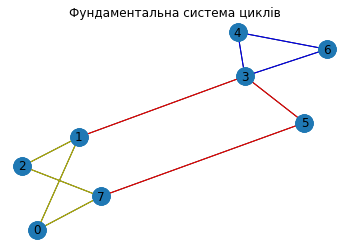

In [10]:
cycles = nx.cycle_basis(G)
plt.title('Фундаментальна система циклiв')
nx.draw(G, pos, with_labels=True)
print("Фундаментальна система циклiв", cycles)
Gr = nx.Graph()
Gr.add_nodes_from(G)
for i in range(len(cycles)):
    l = len(cycles[i])
    c = cycles[i]
    for j in range(l):
        Gr.add_edge(c[j], c[(j + 1) % l], color=get_adj_mx.colors[i])
        
edges = Gr.edges()
colors = [Gr[u][v]['color'] for u,v in edges]
nx.draw_networkx_nodes(Gr, pos)
nx.draw(Gr, pos, edge_color=colors)
plt.show()

In [11]:
e = nx.eccentricity(G)
r = nx.radius(G)
d = nx.diameter(G)
print(f"Ексцентриситет {e} \nРадіус {r}\nДіаметр {d}\n")

Ексцентриситет {0: 3, 1: 2, 2: 3, 3: 2, 4: 3, 5: 2, 6: 3, 7: 3} 
Радіус 2
Діаметр 3

